In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1. Read in the provided data file using pandas and convert missing data to NA values.

In [107]:
# reading data
data = pd.read_csv('data/2315676.txt',skiprows=[1],na_values=[-9999],delim_whitespace=True)

In [108]:
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0


### 2. Fill in the missing values in the `TAVG` column with your estimates of the average daily temperature as noted above in the data section. You can then drop any average daily temperatures that are still missing.

In [109]:
# checking null values in tavg
data.isnull().sum()

STATION             0
STATION_NAME        0
DATE                0
TAVG            19843
TMAX              769
TMIN             1946
dtype: int64

In [110]:
# defining function for calculating tavg value
def avg_temp(tmax,tmin):
    """given tmax and tmin function return tavg.
    
    """
    tavg=(tmin+tmax)/2
    return tavg


In [111]:

# Iterate over the rows of dataframe
for idx, row in data.iterrows():
    
    #checking tavg row contain nan value or not
    if pd.isna(row['TAVG']):
        
        #if value of tavg row is nan passing tmin and tmax value of same row into avg_temp function
        TAVG=avg_temp(row['TMIN'],row['TMAX'])
        
        #using .at filling nan value for tavg column
        data.at[idx, "TAVG"] = TAVG

In [112]:
# Drop any rows that still have missing TAVG values
data.dropna(subset=['TAVG'], inplace=True)

In [113]:
# confirming that TAVG column no longer contains nan values
data['TAVG'].isnull().sum()

0

### 3. Define and use a function to convert temperatures in Fahrenheit to Celsius.

In [114]:
def fahr_to_celsius(temp_fahrenheit):
    """Function to convert Fahrenheit temperature into Celsius.

    """

    # Convert the Fahrenheit into Celsius
    converted_temp = (temp_fahrenheit - 32) / 1.8

    return converted_temp

In [115]:
# applying fahr_to_celsius function using .apply method and storing result in TAVG_celsius column
data['TAVG_celsius']=data['TAVG'].apply(fahr_to_celsius)

In [116]:
# checking the new dataframe
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_celsius
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-27.500000
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-23.333333
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-23.333333
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-26.111111
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-26.666667


4. Calculate seasonal average temperatures for each season in every year (e.g., Winter 1909, Spring 1909, Summer 1909, ...)

    - The seasons should include the following months:
    
        - Winter: December, January, February
        - Spring: March, April, May
        - Summer: June, July, August
        - Autumn: September, October, November

In [117]:
# convert YR--MODAHRMN to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

In [120]:
# extract the month and year  components into separate columns from the date
data['MONTH'] = data['DATE'].dt.month
data['YEAR']=data['DATE'].dt.year

In [123]:
# checking the new dataframe
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_celsius,MONTH,YEAR,SEASON
0,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-01,-17.5,2.0,-37.0,-27.500000,1,1908,Winter
1,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-02,-10.0,6.0,-26.0,-23.333333,1,1908,Winter
2,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-03,-10.0,7.0,-27.0,-23.333333,1,1908,Winter
3,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-04,-15.0,-3.0,-27.0,-26.111111,1,1908,Winter
4,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-05,-16.0,4.0,-36.0,-26.666667,1,1908,Winter


In [124]:

def get_season(month):
    """ given month get_season function returns season.
    """
    if month in [12,  1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return None

# applying get_season function using .apply method and storing result in SEASON column
data['SEASON'] = data['MONTH'].apply(get_season)

In [125]:
#checking new dataframe
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_celsius,MONTH,YEAR,SEASON
0,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-01,-17.5,2.0,-37.0,-27.500000,1,1908,Winter
1,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-02,-10.0,6.0,-26.0,-23.333333,1,1908,Winter
2,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-03,-10.0,7.0,-27.0,-23.333333,1,1908,Winter
3,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-04,-15.0,-3.0,-27.0,-26.111111,1,1908,Winter
4,GHCND:FI000007501,SODANKYLA-AWS-FI,1908-01-05,-16.0,4.0,-36.0,-26.666667,1,1908,Winter


In [128]:
# applying groupby operation on year and season column and taking mean of TAVG_celsius column and storing it in seasonal temp 
seasonal_temps = data.groupby(['YEAR', 'SEASON'])['TAVG_celsius'].mean().reset_index()

In [129]:
# checking the dataframe
seasonal_temps.head()

,YEAR,SEASON,TAVG_celsius
0,1908,Autumn,-1.859217
1,1908,Spring,-2.346743
2,1908,Summer,11.425926
3,1908,Winter,-12.330779
4,1909,Autumn,-0.155827


### Calculate seasonal average temperatures for the reference period 1951-1980 (e.g., 4 values in total, one for each season)

In [130]:
# filter data based on the reference period
seasonal_avg_temps=data[(data['YEAR']>=1951) & (data['YEAR']<=1980)]

In [137]:
# create a new column for the season
seasonal_avg_temps['SEASON'] = seasonal_avg_temps['MONTH'].apply(get_season)


C:\Users\aman\AppData\Local\Temp\ipykernel_1604\3742216458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_avg_temps['SEASON'] = seasonal_avg_temps['MONTH'].apply(get_season)


In [139]:
# group the data by year and season, and calculate the mean temperature for each group
seasonal_avg_temps = seasonal_avg_temps.groupby(['YEAR', 'SEASON'])['TAVG_celsius'].mean().reset_index()

In [140]:
# pivot the data to have seasons as columns and years as rows
seasonal_avg_temps = seasonal_avg_temps.pivot(index='YEAR', columns='SEASON', values='TAVG_celsius')

In [145]:
# display the seasonal average temperatures for the reference period
seasonal_avg_temps.mean()

SEASON
Autumn    -0.816010
Spring    -2.338516
Summer    12.400262
Winter   -13.553475
dtype: float64

### 6. Calculate seasonal temperature anomalies for each year

In [149]:
# group the data by year and season, and calculate the mean temperature for each group
seasonal_avg_temp=data.groupby(['YEAR', 'SEASON'])['TAVG_celsius'].mean().reset_index()

In [ ]:
# filter data for the reference period
ref_temps=data[(data['YEAR']>=1951) & (data['YEAR']<=1980)]
ref_seasonal_avg = ref_temps.groupby('SEASON')['TAVG_celsius'].mean().reset_index()

In [154]:
# Merge with seasonal average temperature for the reference period and renaming tavg_celsius column to ref_temp
ref_seasonal_avg = ref_seasonal_avg.rename(columns={'TAVG_celsius': 'ref_temp'})
seasonal_avg = seasonal_avg_temp.merge(ref_seasonal_avg, on='SEASON')

In [181]:
# Calculate seasonal temperature anomalies
seasonal_avg['anomaly'] = seasonal_avg['TAVG_celsius'] - seasonal_avg['ref_temp']

In [182]:
# displaying seasonal anomaly
seasonal_avg.head()

,YEAR,SEASON,TAVG_celsius,ref_temp,anomaly
0,1908,Autumn,-1.859217,-0.81491,-1.044307
1,1909,Autumn,-0.155827,-0.81491,0.659083
2,1910,Autumn,-1.742063,-0.81491,-0.927154
3,1911,Autumn,-1.279150,-0.81491,-0.464240
4,1912,Autumn,-2.073413,-0.81491,-1.258503


### Plot the data as shown in the example above

In [163]:
#for plotting purpose creating four season anomaly dataframe 
winter_anomaly=seasonal_avg[seasonal_avg['SEASON']=='Winter']
Autumn_anomaly=seasonal_avg[seasonal_avg['SEASON']=='Autumn']
Spring_anomaly=seasonal_avg[seasonal_avg['SEASON']=='Spring']
Summer_anomaly=seasonal_avg[seasonal_avg['SEASON']=='Summer']

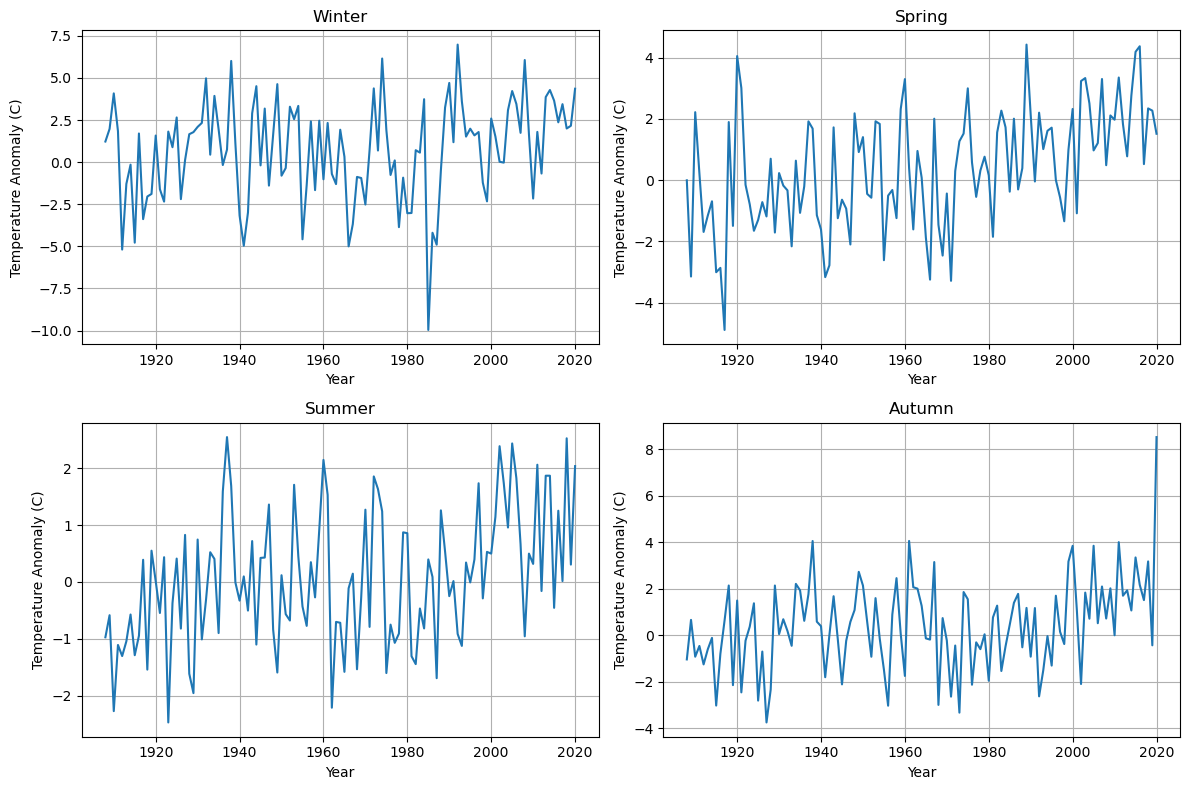

In [212]:
 #Define the seasons and their corresponding dataframes
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
dataframes = [winter_anomaly, Spring_anomaly, Summer_anomaly, Autumn_anomaly]

# Create a 2x2 subplot figure with a specified size
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterate through each season and its corresponding dataframe
for i, season in enumerate(seasons):
    row = i // 2  # Calculate the row index based on the iteration number
    col = i % 2   # Calculate the column index based on the iteration number
    
    # Plot the temperature anomalies for the current season
    axs[row, col].plot(dataframes[i]['YEAR'], dataframes[i]['anomaly'])
    
    # Set the title and axis labels for the current subplot
    axs[row, col].set_title(season)
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Temperature Anomaly (C)')
    axs[row, col].grid()
# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()

## In this project, we performed the following tasks:

- Read in the provided data file using pandas and convert missing data to NA values.
- Filled in the missing values in the TAVG column with avg_temp function as noted above in the data section. We then dropped any average daily temperatures that were still missing.
- Defined and used a function to convert temperatures in Fahrenheit to Celsius.
- Calculated seasonal average temperatures for each season in every year using the provided get_season function. We extracted the year and season from the date and grouped the data by year and season to calculate the mean seasonal temperature.
- Calculated seasonal average temperatures for the reference period 1951-1980 using the same get_season function and grouping the data by season. We calculated the mean seasonal temperature for each season in the reference period.
- Calculated seasonal temperature anomalies for each year by subtracting the seasonal average temperature for the reference period from the seasonal average temperature for each year.
- Plotted the seasonal temperature anomalies using matplotlib. We created a subplot for each season and plotted the anomalies against the years. We added axis labels and titles to each subplot and added grid lines for clarity.

Overall, we were able to analyze the temperature data and calculate seasonal averages and anomalies. We visualized the results in a clear and concise manner using subplots and appropriate axis labels and titles.


